Loading Data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data Loaded. Training Shape: (25000, 200)

Training Baseline Model...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.6663 - loss: 0.5738 - val_accuracy: 0.8674 - val_loss: 0.3175
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - accuracy: 0.9030 - loss: 0.2576 - val_accuracy: 0.8552 - val_loss: 0.3525
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.9316 - loss: 0.1844 - val_accuracy: 0.8652 - val_loss: 0.3362
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9582 - loss: 0.1265 - val_accuracy: 0.8724 - val_loss: 0.3542
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9684 - loss: 0.0952 - val_accuracy: 0.8638 - val_loss: 0.3974

Training Tuned Model (This takes longer)...
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 102s 313ms/step - accuracy: 0.6646 - loss: 0.5865 - val_accuracy: 0.8242 - val_loss: 0.4058
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 97s 308ms/step - accuracy: 0.8616 - loss: 0.3383 - val_accuracy: 0.8378 - val_loss: 0.4130
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 310ms/step - ac

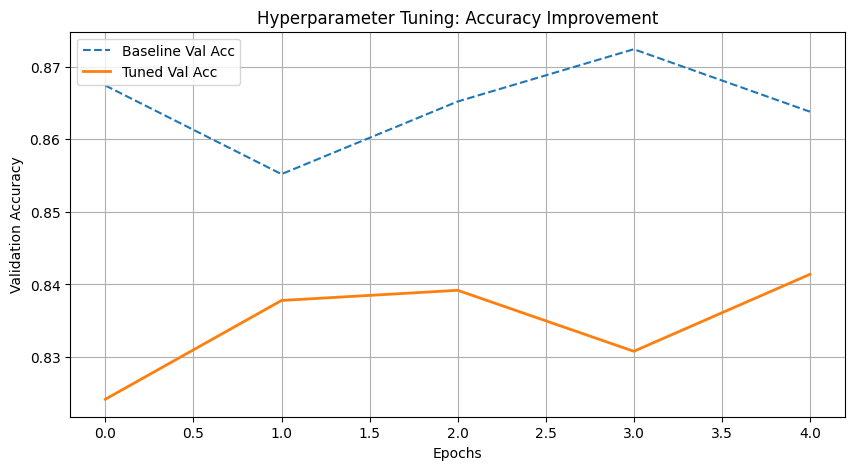

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
import matplotlib.pyplot as plt

# --- 1. PREPROCESSING ---
# Only keep the top 10,000 most frequently occurring words
MAX_WORDS = 10000
# Cut off reviews after 200 words
MAX_LEN = 200

print("Loading Data...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

# Pad sequences (ensure all inputs are same length)
X_train = pad_sequences(X_train, maxlen=MAX_LEN)
X_test = pad_sequences(X_test, maxlen=MAX_LEN)

print(f"Data Loaded. Training Shape: {X_train.shape}")

# --- 2. BASELINE MODEL (Simple LSTM) ---
def build_baseline_model():
    model = Sequential()
    model.add(Embedding(input_dim=MAX_WORDS, output_dim=32, input_length=MAX_LEN))
    model.add(LSTM(32)) # Small, simple LSTM
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

print("\nTraining Baseline Model...")
baseline = build_baseline_model()
hist_base = baseline.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# --- 3. TUNED MODEL (Hyperparameter Optimization) ---
# Improvements:
# 1. Output Dim: Increased Embedding size to 128 (richer word representation).
# 2. Dropout: Added SpatialDropout to prevent overfitting.
# 3. Units: Increased LSTM units to 64.
# 4. Dropout: Added recurrent dropout inside LSTM.
def build_tuned_model():
    model = Sequential()
    model.add(Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN))
    model.add(SpatialDropout1D(0.3)) # Drops entire 1D feature maps
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2)) # Robust LSTM
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

print("\nTraining Tuned Model (This takes longer)...")
tuned = build_tuned_model()
hist_tuned = tuned.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# --- 4. COMPARISON & RESULTS ---
score_base = baseline.evaluate(X_test, y_test, verbose=0)
score_tuned = tuned.evaluate(X_test, y_test, verbose=0)

print("-" * 40)
print(f"Baseline LSTM Accuracy: {score_base[1]*100:.2f}%")
print(f"Tuned LSTM Accuracy:    {score_tuned[1]*100:.2f}%")
print("-" * 40)

# Plotting Improvement
plt.figure(figsize=(10, 5))
plt.plot(hist_base.history['val_accuracy'], label='Baseline Val Acc', linestyle='--')
plt.plot(hist_tuned.history['val_accuracy'], label='Tuned Val Acc', linewidth=2)
plt.title('Hyperparameter Tuning: Accuracy Improvement')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()